In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/diabetes.csv')

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [ ]:
df.shape

(768, 9)

<Axes: xlabel='Outcome', ylabel='count'>

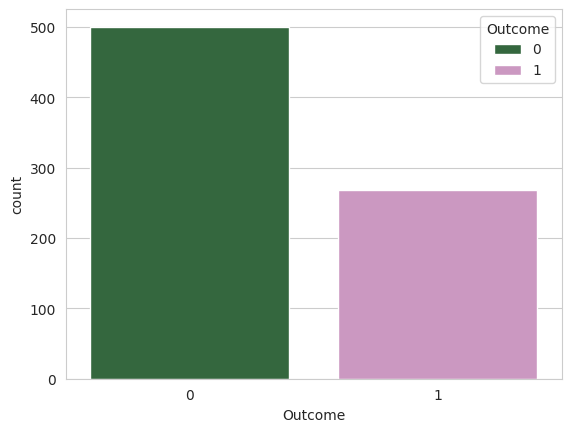

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='Outcome',hue='Outcome',data=df,palette='cubehelix')

In [ ]:
from sklearn.model_selection import train_test_split
x=['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']
y=['Output']
X_train,X_test,y_train,y_test=train_test_split(df.drop('Outcome',axis=1),df['Outcome'],test_size=0.20,random_state=101)

In [ ]:
X_test.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
766,1,126,60,0,0,30.1,0.349,47
748,3,187,70,22,200,36.4,0.408,36
42,7,106,92,18,0,22.7,0.235,48
485,0,135,68,42,250,42.3,0.365,24
543,4,84,90,23,56,39.5,0.159,25


In [ ]:
from sklearn.linear_model import LogisticRegression
LRModel=LogisticRegression(solver='lbfgs', max_iter=7600)
LRModel.fit(X_train,y_train)

LogisticRegression(max_iter=7600)

In [ ]:
predictions_diabetes=LRModel.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test,predictions_diabetes))

              precision    recall  f1-score   support

           0       0.83      0.86      0.85       103
           1       0.70      0.65      0.67        51

    accuracy                           0.79       154
   macro avg       0.77      0.76      0.76       154
weighted avg       0.79      0.79      0.79       154



In [ ]:
# paitentid_54=pd.DataFrame([1,123,126,60,0,30.1,0.349,47],columns=x)
#Defining a sample data to test the model
x=['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']
data=[0,170,126,60,35,30.1,0.649,78]
paitentid_54=pd.DataFrame([data],columns=x)
paitentid_54.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0,170,126,60,35,30.1,0.649,78


In [ ]:
predictions_diabetes=LRModel.predict(paitentid_54)

In [ ]:
print(predictions_diabetes)

[1]
